In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('bbc_news_dataset.csv')
dataset.sample(6)

,ArticleId,Text,Category
1143,187,deutsche boerse set to woo lse bosses of deu...,business
1317,145,blind student hears in colour a blind studen...,tech
737,1860,camera phones are must-haves four times more...,tech
110,2093,us interest rate rise expected us interest rat...,business
502,1402,brazil plays down varig rescue the brazilian g...,business
717,299,bafta to hand out movie honours movie stars fr...,entertainment


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [3]:
value = dataset['Category'].value_counts()
value

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [4]:
x= dataset['Text']
y= dataset['Category']

In [6]:
category_name = dataset['Category'].unique()
category_name

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

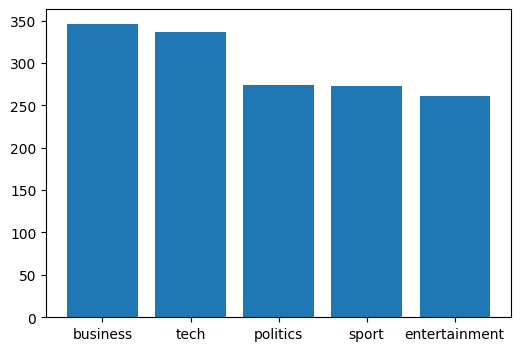

In [9]:
plt.figure(figsize=(6,4))
plt.bar(x=category_name,height=value)
plt.show()

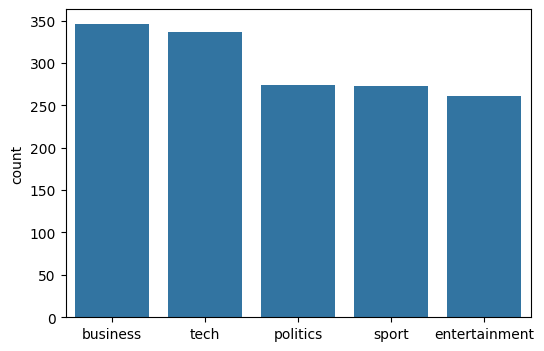

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(x= category_name,y=value)
plt.show()

In [ ]:
# from wordcloud import WordCloud 
# for category in category_name:
#     text=" ".join(dataset[dataset ['Category']==category]['Text'].values)
#     wordcloud = wordCloud(
#         width=888,height=400,background_color='white'
#     ).generate(text)
#     plt.figure(figsize=(6,4))

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.shape

(1192,)

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [18]:
nb_model = make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
nb_model.fit(x_train,y_train)
y_preds = nb_model.predict(x_test)


In [20]:
accuracy_score(y_test,y_preds)*100

95.63758389261746

In [22]:
print(classification_report(y_test,y_preds))

               precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



In [23]:
cm =confusion_matrix(y_test,y_preds)
cm

array([[73,  0,  1,  0,  1],
       [ 1, 44,  1,  0,  0],
       [ 2,  0, 53,  1,  0],
       [ 0,  0,  0, 63,  0],
       [ 2,  0,  3,  1, 52]])

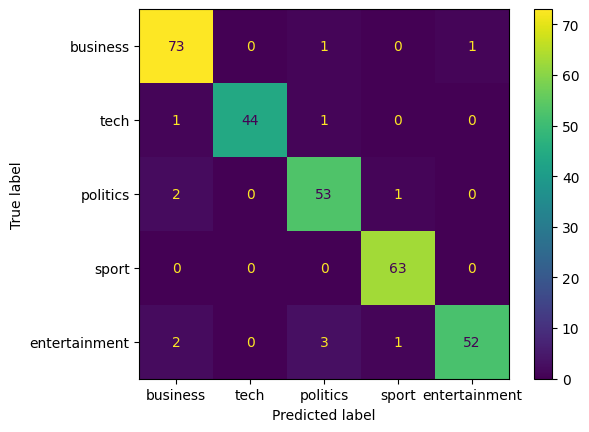

In [25]:
cm_plot = ConfusionMatrixDisplay(
    confusion_matrix=cm , display_labels=dataset['Category'].unique()
)
cm_plot.plot()
plt.show()

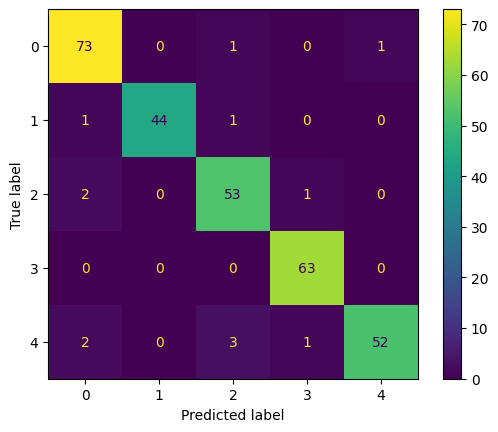

In [26]:
cm_plot = ConfusionMatrixDisplay(
    confusion_matrix=cm 
)
cm_plot.plot()
plt.show()

In [ ]:
test_value = ['india won a cricket worldcup'],['samir make ']

In [28]:
dataset['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [31]:
dataset[dataset['Category'] =='business']['Text'].sample(5)

1175    stormy year for property insurers a string of ...
610     us trade deficit widens sharply the gap betwee...
804     bush to get  tough  on deficit us president ge...
81      peugeot deal boosts mitsubishi struggling japa...
1197    tsunami to cost sri lanka $1.3bn sri lanka fac...
Name: Text, dtype: object

In [35]:
ram=dataset['Text'][81]

In [44]:
one =[ram]

In [45]:
nb_model.predict(one)

array(['business'], dtype='<U13')

In [46]:
dataset[dataset['Category'] =='entertainment']['Text'].sample(5)

951     the comic book genius of stan lee stan lee  th...
470     de niro completes box office coup robert de ni...
1292    uganda bans vagina monologues uganda s authori...
447     bennett play takes theatre prizes the history ...
187     hollywood ready for oscars night hollywood is ...
Name: Text, dtype: object

In [47]:
two = [dataset['Text'][447]]

In [48]:
nb_model.predict(two)

array(['entertainment'], dtype='<U13')